# Homework 3 


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

1) Dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [85]:
df = pd.read_csv(r'C:\Users\Александра\Downloads\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [87]:
df.shape

(768, 9)

In [88]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [89]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [90]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

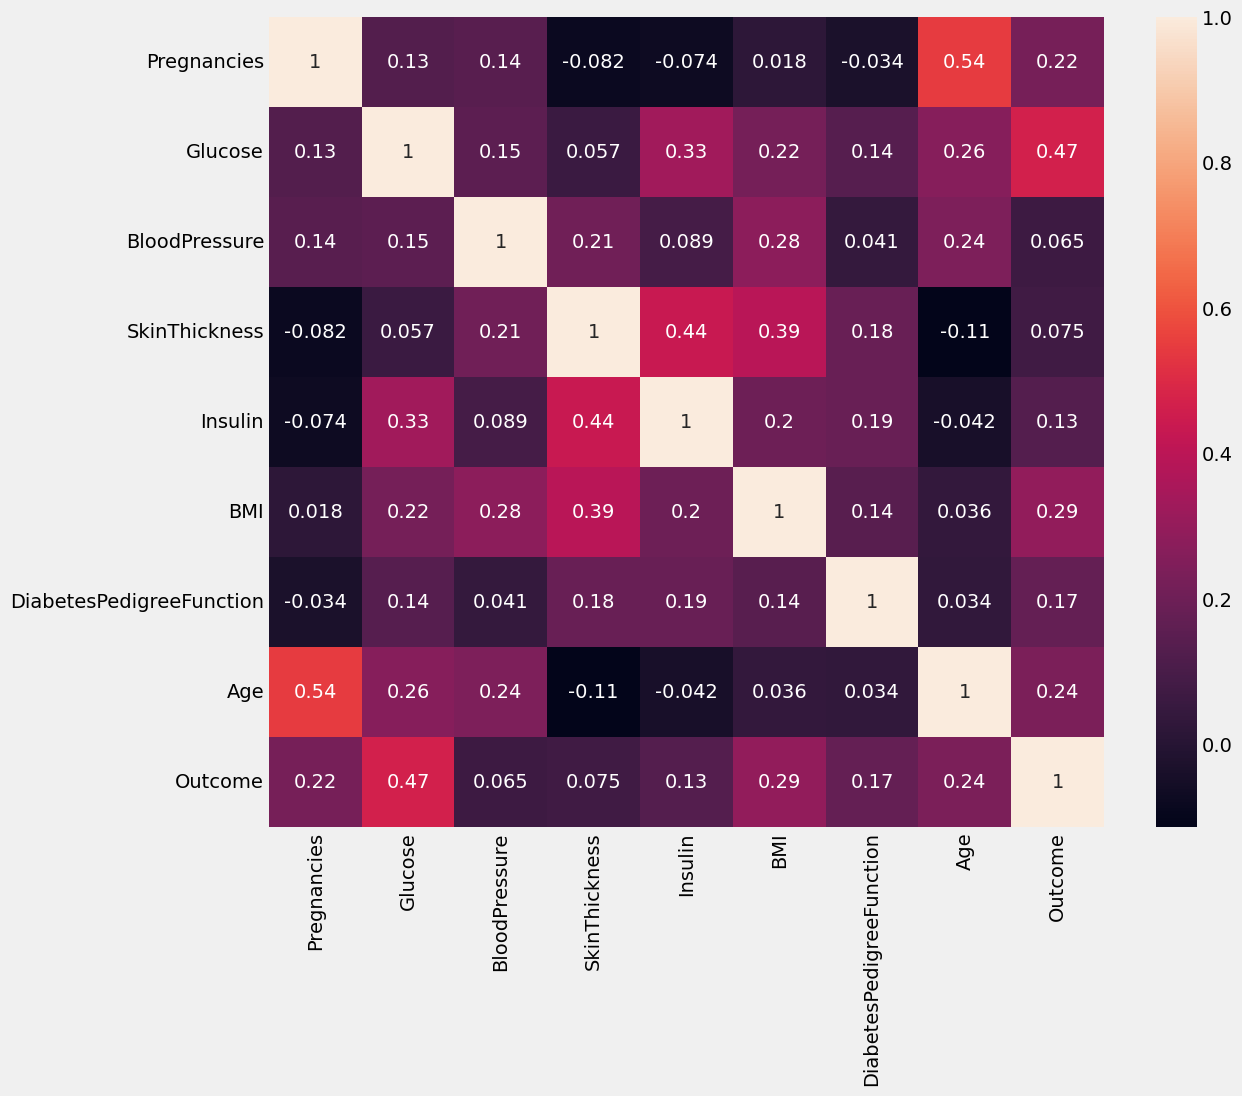

In [91]:
plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), annot =True)

2) kmeans, dbscan, иерархическая

In [92]:
features = df[['Glucose', 'BloodPressure','Insulin', 'BMI','Age' ]]

In [93]:
features

,Glucose,BloodPressure,Insulin,BMI,Age
0,148,72,0,33.6,50
1,85,66,0,26.6,31
2,183,64,0,23.3,32
3,89,66,94,28.1,21
4,137,40,168,43.1,33
...,...,...,...,...,...
763,101,76,180,32.9,63
764,122,70,0,36.8,27
765,121,72,112,26.2,30
766,126,60,0,30.1,47


In [94]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [95]:
scaled_features

array([[ 0.84832379,  0.14964075, -0.69289057,  0.20401277,  1.4259954 ],
       [-1.12339636, -0.16054575, -0.69289057, -0.68442195, -0.19067191],
       [ 1.94372388, -0.26394125, -0.69289057, -1.10325546, -0.10558415],
       ...,
       [ 0.00330087,  0.14964075,  0.27959377, -0.73518964, -0.27575966],
       [ 0.1597866 , -0.47073225, -0.69289057, -0.24020459,  1.17073215],
       [-0.8730192 ,  0.04624525, -0.69289057, -0.20212881, -0.87137393]])

In [96]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [97]:
kmeans.inertia_

2527.1694013382817

In [98]:
kmeans.cluster_centers_

array([[ 0.87563767,  0.30692724,  1.27786368,  0.68661359, -0.18396802],
       [ 0.36603046,  0.53201351, -0.4237208 ,  0.05071538,  1.1479898 ],
       [-0.58007467, -0.43028478, -0.30803133, -0.3220116 , -0.56673332]])

In [99]:
kmeans.n_iter_

12

In [100]:
kmeans.labels_

array([1, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2,
       1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2,
       0, 0, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 1, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0,
       1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2,
       2, 0, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 2, 1,
       0, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2,
       2, 2, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1,
       0, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2,

In [101]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan.fit(scaled_features)

DBSCAN(min_samples=4)

In [102]:
dbscan.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       10, -1,  2, -1,  0, -1, -1, 11, -1, -1, -1, -1, -1,  0,  0, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1,  1,  2, -1, -1,  2,  0, -1, -1,
        0, -1,  0, -1, -1, -1,  0, -1,  3,  0, -1,  0, -1,  1, -1,  0, -1,
        0,  4,  0, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1,
       -1,  0,  0,  0, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1,  0, -1,  0,
        0, -1,  0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1,  4,  0,  7,
        0,  0,  0, -1, -1,  4, -1,  2, -1, -1,  3, -1, -1,  0,  0, -1, -1,
       -1, -1, -1,  0,  0,  0, -1, -1, -1, -1,  0,  0, -1,  9,  0,  0, -1,
       -1,  7, -1, -1, -1, -1, -1, -1, -1, 11, -1,  0, -1,  0, -1, -1, -1,
       -1,  0, -1,  0, -1, -1, -1, -1, -1,  0,  0,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  0,  5, -1, -1, -1, -1,  0, -1,  0, -1, -1,
       -1, -1, -1,  0,  0

In [103]:
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(scaled_features)

AgglomerativeClustering(n_clusters=3)

In [104]:
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round(2)
agglomerative_silhouette = silhouette_score(scaled_features, agglomerative.labels_).round(2)

In [105]:
kmeans_silhouette

0.24

In [106]:
dbscan_silhouette

-0.29

In [107]:
agglomerative_silhouette

0.23

In [142]:
from sklearn.metrics.cluster import rand_score
from sklearn.preprocessing import LabelEncoder

true_labels = LabelEncoder.fit_transform df[['Age']]
true_labels

SyntaxError: invalid syntax (2054401346.py, line 4)

According to the coefficient K-means method is performing better on this data with the selected features.

3) Classification models

In [108]:
x = df.drop(columns = 'Outcome')


y = df['Outcome'] #predicted

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [110]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       107
           1       0.61      0.57      0.59        47

    accuracy                           0.76       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix:
 [[90 17]
 [20 27]]
Training Score:
 78.17589576547232
Mean Squared Error:
 0.24025974025974026
R2 score is:
 -0.13302843507655582


In [111]:
print(accuracy_score(y_test,y_pred)*100)

75.97402597402598


we get a accuracy score of 75.97 % using KNeighborsClassifier

In [112]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [113]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix:
 [[98  9]
 [23 24]]
Training Score:
 75.8957654723127
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [114]:
print(accuracy_score(y_test,y_pred)*100)

79.22077922077922


we get a accuracy score of 79.22 % using SVC

In [115]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [116]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[93 14]
 [18 29]]
Training Score:
 75.7328990228013
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [117]:
print("Accuracy Score:\n",gnb.score(x_train,y_train)*100)

Accuracy Score:
 75.7328990228013


 we get a accuracy score of 75.73 % using Naiye Bayes

In [118]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [119]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       107
           1       0.59      0.43      0.49        47

    accuracy                           0.73       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.72      0.73      0.72       154

Confusion Matrix:
 [[93 14]
 [27 20]]
Training Score:
 82.08469055374593
Mean Squared Error:
 0.2662337662337662
R2 score is:
 -0.2555179956253728


In [120]:
print(accuracy_score(y_test,y_pred)*100)

73.37662337662337


we get accuracy score of 73.37 % using DecisionTreeClassifier

In [121]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [122]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.70      0.70      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154

Confusion Matrix:
 [[93 14]
 [14 33]]
Training Score:
 100.0
Mean Squared Error:
 0.18181818181818182
R2 score is:
 0.14257307615828196


In [123]:
print(accuracy_score(y_test,y_pred)*100)

81.81818181818183


we get a accuracy score of 81.82 % using RandomForestClassifier

5. So now we should conclude the accuracy of different models:

KNeighbors Classifier= 75.97 %

SVC= 79.22 %

Naiye Bayes= 75.73 %

Decision Tree Classifier= 73.37%

Random Forest Classifier= 81.82%

We can state that Random Forest Classifier was the best model in our case